In [5]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects
from extract_remove_nans import extract_remove_nans

# read data
with open('data.dat') as f:
    data, subjects = pickle.load(f)
f.close()

n_boot = 100
scorefunction = 'replacement'
output = 'difference'
var_threshold = 0.5

ind_set = range(len(data))

es_m2s_mean = np.zeros([n_boot,4])
es_s2m_mean = np.zeros([n_boot,4])
es_s2m_um_mean = np.zeros([n_boot, 1])
es_m2s_um_mean = np.zeros([n_boot, 1])
    

for k in range(n_boot):
    
    print k,
    
    inds = np.random.choice(ind_set, size=len(data), replace=True)

    es_s2m = np.zeros([len(data),4])
    es_m2s = np.zeros([len(data),4])
    es_s2m_um = np.zeros([len(data), 1])
    es_m2s_um = np.zeros([len(data), 1])
    
    for (c,i) in enumerate(inds):
        
        if np.nanstd(data[i]['mood'])<var_threshold or np.nanstd(data[i]['quality'])<var_threshold:
            print 'skipping subject '+str(i)+' due to low variance in mood or sleep quality.'
            es_m2s_um[c] = np.nan
            es_m2s[c,:] = np.nan
            es_s2m_um[c] = np.nan
            es_s2m[c,:] = np.nan
            continue
       
        # mood on sleep - lag 0 - unmatched
        treatment = 'mood_prev'
        outcome = 'quality'
        data_s = extract_remove_nans(data[i], [treatment]+[outcome])
        es_m2s_um[c] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=[], scorefun='unmatched', output=output)
        
        # mood on sleep - lag 0
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,0] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # mood on sleep - lag 1
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,1] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

        # mood on sleep - lag 2
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev','mood_prev3','quality_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,2] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

        # mood on sleep - lag 3
        confound = ['dow', 'mean_temp_prev2', 'clear_prev2', 'act_prev2','daytype','stress_prev2','energy_prev2','focus_prev2','mood_prev2','quality_prev','mood_prev3','quality_prev2','mood_prev4','quality_prev3']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_m2s[c,3] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)

        ################ sleep on mood
        
        # sleep on mood - lag 0 - unmatched
        treatment = 'quality'
        outcome = 'mood'
        data_s = extract_remove_nans(data[i], [treatment]+[outcome])
        es_s2m_um[c] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=[], scorefun='unmatched', output=output)
        
        # sleep on mood - lag 0
        confound = ['dow', 'mean_temp_prev', 'clear_prev', 'act_prev','daytype','stress_prev','energy_prev','focus_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,0] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # sleep on mood - lag 1
        confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,1] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # sleep on mood - lag 2
        confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev','mood_prev2','quality_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,2] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
        # sleep on mood - lag 3
        confound = ['dow', 'mean_temp_prev', 'clear_prev','act_prev','daytype','stress_prev','energy_prev','focus_prev','mood_prev','quality_prev','mood_prev2','quality_prev2','mood_prev3','quality_prev3']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        es_s2m[c,3] = psm_causal_effects(treatment=data_s[treatment], outcome=data_s[outcome], confound=data_s[confound], scorefun=scorefunction, output=output)
        
    es_m2s_mean[k,:] = np.nanmean(es_m2s, axis=0)
    es_s2m_mean[k,:] = np.nanmean(es_s2m, axis=0)
    es_m2s_um_mean[k] = np.nanmean(es_m2s_um, axis=0)
    es_s2m_um_mean[k] = np.nanmean(es_s2m_um, axis=0)
    


0 skipping subject 6 due to low variance in mood or sleep quality.
skipping subject 61 due to low variance in mood or sleep quality.
skipping subject 158 due to low variance in mood or sleep quality.
skipping subject 171 due to low variance in mood or sleep quality.
skipping subject 26 due to low variance in mood or sleep quality.
skipping subject 61 due to low variance in mood or sleep quality.
skipping subject 96 due to low variance in mood or sleep quality.
skipping subject 171 due to low variance in mood or sleep quality.
skipping subject 174 due to low variance in mood or sleep quality.
skipping subject 8 due to low variance in mood or sleep quality.
skipping subject 57 due to low variance in mood or sleep quality.
skipping subject 135 due to low variance in mood or sleep quality.
skipping subject 96 due to low variance in mood or sleep quality.
skipping subject 135 due to low variance in mood or sleep quality.
skipping subject 171 due to low variance in mood or sleep quality.
ski

## Group Difference

In [3]:
## t-tests
from scipy.stats import ttest_ind
t,p = ttest_ind(es_m2s_um_mean, es_s2m_um_mean, equal_var=False, axis=0)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,0], es_s2m_mean[:,0], equal_var=False)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,1], es_s2m_mean[:,1], equal_var=False)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,2], es_s2m_mean[:,2], equal_var=False)
print('T,P = ',t,p)
t,p = ttest_ind(es_m2s_mean[:,3], es_s2m_mean[:,3], equal_var=False)
print('T,P = ',t,p)

NameError: name 'es_m2s_um_mean' is not defined

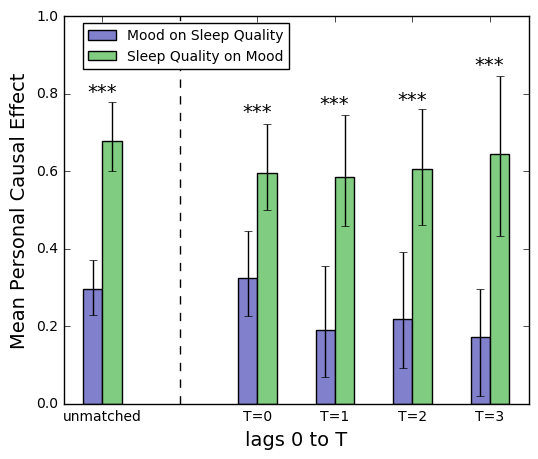

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,5))
yerrs = np.array([[np.mean(es_m2s_um_mean)-np.percentile(es_m2s_um_mean,2.5),np.mean(es_m2s_mean[:,0])-np.percentile(es_m2s_mean[:,0],2.5),\
    np.mean(es_m2s_mean[:,1])-np.percentile(es_m2s_mean[:,1],2.5),np.mean(es_m2s_mean[:,2])-np.percentile(es_m2s_mean[:,2],2.5),\
    np.mean(es_m2s_mean[:,3])-np.percentile(es_m2s_mean[:,3],2.5)],\
    [np.percentile(es_m2s_um_mean,97.5)-np.mean(es_m2s_um_mean),np.percentile(es_m2s_mean[:,0],97.5)-np.mean(es_m2s_mean[:,0]),\
    np.percentile(es_m2s_mean[:,1],97.5)-np.mean(es_m2s_mean[:,1]),np.percentile(es_m2s_mean[:,2],97.5)-np.mean(es_m2s_mean[:,2]),\
    np.percentile(es_m2s_mean[:,3],97.5)-np.mean(es_m2s_mean[:,3])]])
plt.bar([-.25,1.75,2.75,3.75,4.75],np.concatenate([np.array([np.mean(es_m2s_um_mean)]),np.mean(es_m2s_mean,axis=0)],axis=0).reshape([5,1]),yerr=yerrs,\
    ecolor=(0,0,0),width=.25,color=(.5,.5,.8))
yerrs = np.array([[np.mean(es_s2m_um_mean)-np.percentile(es_s2m_um_mean,2.5),np.mean(es_s2m_mean[:,0])-np.percentile(es_s2m_mean[:,0],2.5),\
    np.mean(es_s2m_mean[:,1])-np.percentile(es_s2m_mean[:,1],2.5),np.mean(es_s2m_mean[:,2])-np.percentile(es_s2m_mean[:,2],2.5),\
    np.mean(es_s2m_mean[:,3])-np.percentile(es_s2m_mean[:,3],2.5)],\
    [np.percentile(es_s2m_um_mean,97.5)-np.mean(es_s2m_um_mean),np.percentile(es_s2m_mean[:,0],97.5)-np.mean(es_s2m_mean[:,0]),\
    np.percentile(es_s2m_mean[:,1],97.5)-np.mean(es_s2m_mean[:,1]),np.percentile(es_s2m_mean[:,2],97.5)-np.mean(es_s2m_mean[:,2]),\
    np.percentile(es_s2m_mean[:,3],97.5)-np.mean(es_s2m_mean[:,3])]])
plt.bar([0,2,3,4,5],np.concatenate([np.array([np.mean(es_s2m_um_mean)]),np.mean(es_s2m_mean,axis=0)],axis=0).reshape([5,1]),yerr=yerrs,\
    ecolor=(0,0,0),width=.25,color=(.5,.8,.5))
plt.text(-.2, .79, '***', fontsize=14)
plt.text(1.8, .74, '***', fontsize=14)
plt.text(2.8, .76, '***', fontsize=14)
plt.text(3.8, .77, '***', fontsize=14)
plt.text(4.8, .86, '***', fontsize=14)
a = plt.ylim([0,1])
plt.xlim([-.5,5.5])
plt.xticks([0,2,3,4,5],['unmatched', 'T=0','T=1','T=2','T=3'],rotation=0);
plt.ylabel('Mean Personal Causal Effect',fontsize=14)
plt.xlabel('lags 0 to T',fontsize=14)
plt.legend(['Mood on Sleep Quality','Sleep Quality on Mood'],loc='upper right',bbox_to_anchor=(.5, 1), fontsize=10);
plt.plot([1,1],[a[0],a[1]],'--',color=(0,0,0))

## Linear Output

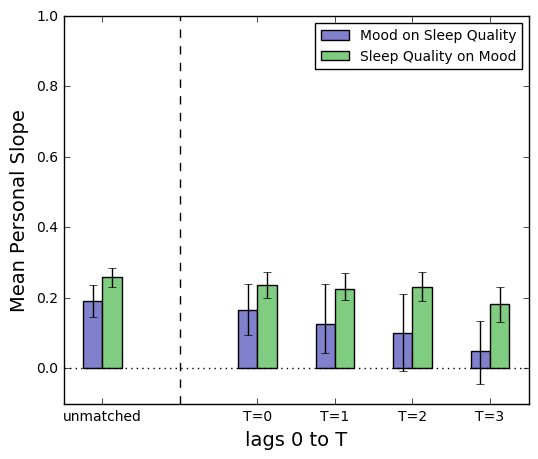

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,5))
yerrs = np.array([[np.mean(es_m2s_um_mean)-np.percentile(es_m2s_um_mean,2.5),np.mean(es_m2s_mean[:,0])-np.percentile(es_m2s_mean[:,0],2.5),\
    np.mean(es_m2s_mean[:,1])-np.percentile(es_m2s_mean[:,1],2.5),np.mean(es_m2s_mean[:,2])-np.percentile(es_m2s_mean[:,2],2.5),\
    np.mean(es_m2s_mean[:,3])-np.percentile(es_m2s_mean[:,3],2.5)],\
    [np.percentile(es_m2s_um_mean,97.5)-np.mean(es_m2s_um_mean),np.percentile(es_m2s_mean[:,0],97.5)-np.mean(es_m2s_mean[:,0]),\
    np.percentile(es_m2s_mean[:,1],97.5)-np.mean(es_m2s_mean[:,1]),np.percentile(es_m2s_mean[:,2],97.5)-np.mean(es_m2s_mean[:,2]),\
    np.percentile(es_m2s_mean[:,3],97.5)-np.mean(es_m2s_mean[:,3])]])
plt.bar([-.25,1.75,2.75,3.75,4.75],np.concatenate([np.array([np.mean(es_m2s_um_mean)]),np.mean(es_m2s_mean,axis=0)],axis=0).reshape([5,1]),yerr=yerrs,\
    ecolor=(0,0,0),width=.25,color=(.5,.5,.8))
yerrs = np.array([[np.mean(es_s2m_um_mean)-np.percentile(es_s2m_um_mean,2.5),np.mean(es_s2m_mean[:,0])-np.percentile(es_s2m_mean[:,0],2.5),\
    np.mean(es_s2m_mean[:,1])-np.percentile(es_s2m_mean[:,1],2.5),np.mean(es_s2m_mean[:,2])-np.percentile(es_s2m_mean[:,2],2.5),\
    np.mean(es_s2m_mean[:,3])-np.percentile(es_s2m_mean[:,3],2.5)],\
    [np.percentile(es_s2m_um_mean,97.5)-np.mean(es_s2m_um_mean),np.percentile(es_s2m_mean[:,0],97.5)-np.mean(es_s2m_mean[:,0]),\
    np.percentile(es_s2m_mean[:,1],97.5)-np.mean(es_s2m_mean[:,1]),np.percentile(es_s2m_mean[:,2],97.5)-np.mean(es_s2m_mean[:,2]),\
    np.percentile(es_s2m_mean[:,3],97.5)-np.mean(es_s2m_mean[:,3])]])
plt.bar([0,2,3,4,5],np.concatenate([np.array([np.mean(es_s2m_um_mean)]),np.mean(es_s2m_mean,axis=0)],axis=0).reshape([5,1]),yerr=yerrs,\
    ecolor=(0,0,0),width=.25,color=(.5,.8,.5))
a = plt.ylim([-.1,1])
plt.xlim([-.5,5.5])
plt.xticks([0,2,3,4,5],['unmatched', 'T=0','T=1','T=2','T=3'],rotation=0);
plt.ylabel('Mean Personal Slope',fontsize=14)
plt.xlabel('lags 0 to T',fontsize=14)
plt.legend(['Mood on Sleep Quality','Sleep Quality on Mood'],loc='upper right',bbox_to_anchor=(1, 1), fontsize=10);
plt.plot([1,1],[a[0],a[1]],'--',color=(0,0,0))
plt.plot([-.5,5.5],[0,0],':',color=(0,0,0))

In [11]:
es_m2s_mean.shape

(100, 4)